In [15]:
# Import Modules
import sys,os
sys.path.append(os.getcwd())

from clarifier_plots import ClarifierPlot
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

In [16]:
# Load the breast cancer classification dataset available
# in the sklearn package
data = load_breast_cancer()
X, y, feature_names = data.data, data.target, data.feature_names
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

# Train a random forest
rf= RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Initializing ClarifierPlot

To initialize `ClarifierPlot`, you need a model object (e.g., a trained sci-kit learn model object) or a list of model objects and a `pandas.Dataframe` of the training examples and targets. 
If it is the case that `examples` and `targets` are arrays, then you must provide the feature names so that the data can be converted to a `pandas.DataFrame`. Now we can explore the various functions and plotting availabe in `ClarifierPlot`. 

In [17]:
c_plt = ClarifierPlot(models=rf, examples=X_train, targets=y_train, feature_names=feature_names)

# Permutation Importance

The permutation importance calculations are performed by a stripped-down version of PermutationImportance (see https://permutationimportance.readthedocs.io/en/latest/ for additional details). In this example, we want the top 5 predictors as determined by the multipass permutation importance method (SOURCE). Additionally, we are using the Area under the Curve (AUC) as our error metric. 

In [18]:
results = c_plt.permutation_importance(n_multipass_vars=5, evaluation_fn='auc', nbootstrap=10)
important_vars = list(results.retrieve_multipass().keys())
print (results.retrieve_multipass(), important_vars)

<function roc_auc_score at 0x11b745940>
Using 1 of processors to compute importance...
Starting on the important variable 0 out of 5...
Starting on the important variable 1 out of 5...
Starting on the important variable 2 out of 5...
Starting on the important variable 3 out of 5...
Starting on the important variable 4 out of 5...
{'worst concavity': (0, array([1.        , 0.99981654, 0.99986906, 0.99987109, 0.99987372,
       0.99989195, 0.99981884, 1.        , 0.99905033, 0.9998624 ])), 'worst compactness': (1, array([0.99979068, 0.99954182, 0.99990247, 0.99955781, 1.        ,
       0.99983381, 1.        , 0.99954767, 1.        , 0.99969299])), 'mean concavity': (2, array([0.99978905, 0.99963086, 0.99983593, 1.        , 0.99963877,
       1.        , 0.99967831, 0.99963061, 0.9998979 , 0.99937577])), 'fractal dimension error': (3, array([0.99982865, 0.99990827, 0.99951237, 0.99996573, 0.99969378,
       0.99989345, 1.        , 1.        , 0.99943748, 0.99987362])), 'smoothness error'

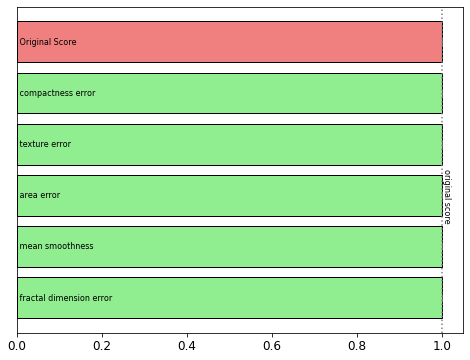

In [5]:
# This commentd out code handles saving and loading the results of the 
# the permutation importance result object. 
# with open('permutation_importance_results.pkl', 'wb') as pkl_file:
#    pickle.dump(importance_obj)
# 
# with open('permutation_importance_results.pkl', 'rb') as pkl_file:
#    importance_obj = pickle.load(pkl_file)
c_plt.plot_variable_importance(importance_obj=results, multipass=True, metric = "Training AUC", num_vars_to_plot=5)

# Partial Dependence Plots

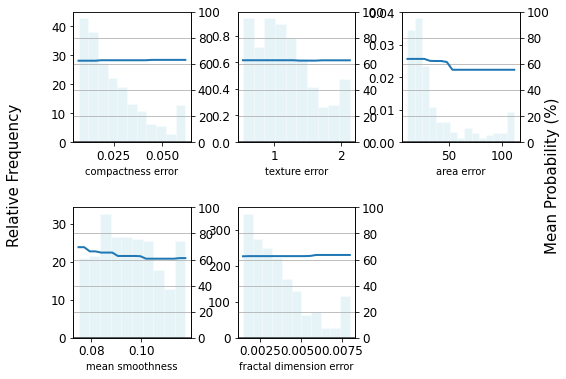

In [6]:
fig, axes = c_plt.plot_pdp(important_vars, nbootstrap=1)

# Accumulated Local Effect

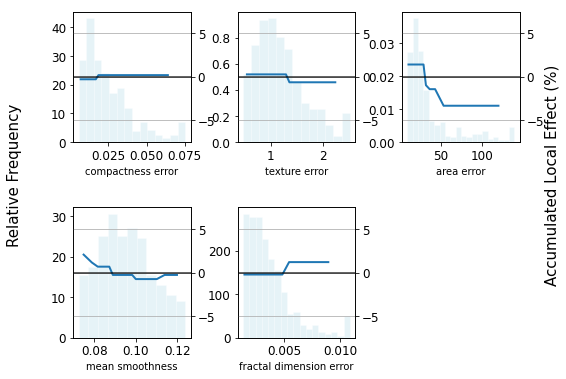

In [7]:
fig, axes = c_plt.plot_ale(important_vars)

# Feature Contributions (Random Forest Only)

For random forest, it is possible to breakdown a prediction into a series of contributions from the predictors. 

hits
Interpreting 10 examples from hits
false_alarms
Interpreting 10 examples from false_alarms
misses
Interpreting 10 examples from misses
corr_negs
Interpreting 10 examples from corr_negs


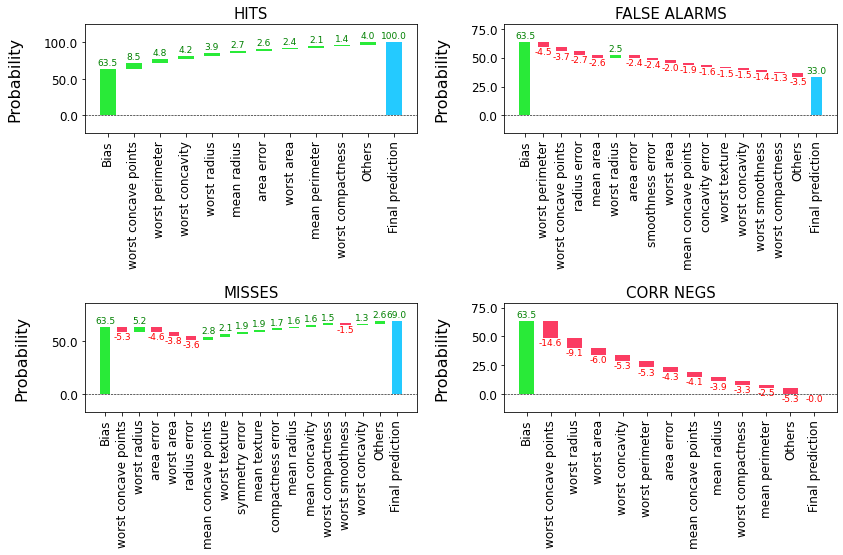

In [8]:
fig = c_plt.plot_performance_based_contributions(n_examples=10)

In [9]:
df = pd.DataFrame(data=X_train, columns=feature_names)

In [10]:
single_example = df.iloc[0, :]
single_example

mean radius                 12.890000
mean texture                13.120000
mean perimeter              81.890000
mean area                  515.900000
mean smoothness              0.069550
mean compactness             0.037290
mean concavity               0.022600
mean concave points          0.011710
mean symmetry                0.133700
mean fractal dimension       0.055810
radius error                 0.153200
texture error                0.469000
perimeter error              1.115000
area error                  12.680000
smoothness error             0.004731
compactness error            0.013450
concavity error              0.016520
concave points error         0.005905
symmetry error               0.016190
fractal dimension error      0.002081
worst radius                13.620000
worst texture               15.540000
worst perimeter             87.400000
worst area                 577.000000
worst smoothness             0.096160
worst compactness            0.114700
worst concav

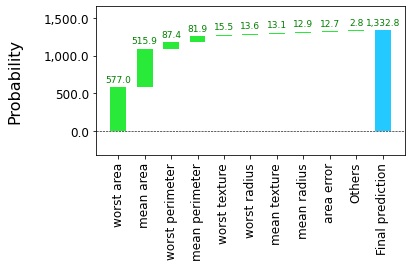

In [11]:
fig = c_plt.plot_treeinterpret(single_example)

# Saving the figures
c_plot.save_figure(fig, fname, bbox_inches="tight", dpi=300, aformat="png")